# HW2 - Basic Data Processing for Data Mining

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 5/24 (Thur)  11:59 AM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [353]:
import sys
sys.version

'3.5.3 |Anaconda 4.4.0 (64-bit)| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]'

## Python Assingment HW2 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [354]:
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem1. Web Crawling & Processing

### Problem 1-1 Fetching the Wikipedia site

#### print html code of presented page
#### Use requests library
> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

In [355]:
url = "https://en.wikipedia.org/wiki/List_of_2016_Summer_Olympics_medal_winners"

###YOUR CODE HERE###
res = requests.get(url)
html = res.text
print(html)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_2016_Summer_Olympics_medal_winners","wgTitle":"List of 2016 Summer Olympics medal winners","wgCurRevisionId":839965383,"wgRevisionId":839965383,"wgArticleId":44675550,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2016 Summer Olympics","Lists of Summer Olympic medalists by year","Medalists at the 2016 Summer Olympics","Rio de Janeiro (city)-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparato

### Problem 1-2 Parsing html data
#### Data that we are going to use is table titled below:
#### Title: Swimming men's events
#### Use BeautifulSoup libary

*print html code of parsed table: Swimming men's events*

> *`<table border="" class="class1 class2" style="font-size: 100%">`*<br/>
> *`<tr style="text-align: center;">`*<br/>
> *`<th scope="col" style="width: 120px;">Event</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

__*hint: class/id can be assigned for elements of html.*__

In [356]:
#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"

###YOUR CODE HERE###
soup = BeautifulSoup(html, 'html.parser')

all_table = soup.find_all('table', {'class' : 'wikitable plainrowheaders'})

target = None
is_find = False
for table in all_table :
    for a in table.find_all('a') :
        if a.get('title') == "Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle" :
            target = table
            is_find = True
            break
    if is_find :
        break

if target :
    print(target)
else :
    print('target not found. something wrong')

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>50 m freestyle<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Swimming_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_50_metre_freestyle" title="Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle">details</a></span></td>
<td><a href="/wiki/Anthony_Ervin" title="Anthony Ervin">Anthony Ervin</a><br/>
<img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.w

### Problem 1-3 Extracting data and filling it into a dictionary(Python data stucture)

#### Extract  countries and medals from "Athletics - Women" table and store it in dictionary.
*Please print parsed dictionary at the end of code*

#### Shape of Dictionary
__Include only once if athlete have received the same medal more than once. ex) 100m gold Bolt, 200m gold Bolt -> gold: Bolt__
- { *country_name*: { *medal type*: [*athlete name,* *athlete name,* *athlete name,* ...], ... }}
- e.g. {'Jamaica': {'Gold': ['Elaine Thompson', 'Shaunae Miller'...], 'Silver': [...], 'Bronze': [...] }, 'United States': ... }

*__hint: Use above problem's code to get Atheletics - Women table__*

In [357]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###
target_2 = None
is_find = False

for table in all_table :
    for a in table.find_all('a') :
        if a.get('title') == "Athletics at the 2016 Summer Olympics – Women's 100 metres" :
            target_2 = table
            is_find = True
            break
    if is_find :
        break

if not target_2 :
    print('traget not found. something wrong')
   
all_td = target_2.find_all('td')
dic = {}

medal_count = 0
medals = ('Gold', 'Silver', 'Bronze')

for td in all_td :
    all_a = td.find_all('a')

    if len(all_a) < 2 :
        # first td delete
        continue
    elif len(all_a) == 2 :
        # normal
        medal = medals[medal_count%3]
        name = [all_a[0].string]
        country = all_a[1].string
        
    else :
        # relay
        medal = medals[medal_count%3]
        country = all_a[0].string
        name = []
        for i in range(1, len(all_a)) :
            name.append(str(all_a[i].string))
    
    if country in dic :
        for n in name :
            if not n in dic[country][medal] :
                dic[country][medal].append(n)
    else :
        dic[country] = {'Gold' : [], 'Silver' : [], 'Bronze' : []}
        for n in name :
            if not n in dic[country][medal] :
                dic[country][medal].append(n)

    medal_count +=1
    
dic

{'Bahamas': {'Bronze': [], 'Gold': ['Shaunae Miller'], 'Silver': []},
 'Bahrain': {'Bronze': [], 'Gold': ['Ruth Jebet'], 'Silver': ['Eunice Kirwa']},
 'Belgium': {'Bronze': [], 'Gold': ['Nafissatou Thiam'], 'Silver': []},
 'Bulgaria': {'Bronze': [], 'Gold': [], 'Silver': ['Mirela Demireva']},
 'Burundi': {'Bronze': [], 'Gold': [], 'Silver': ['Francine Niyonsaba']},
 'Canada': {'Bronze': ['Brianne Theisen-Eaton'], 'Gold': [], 'Silver': []},
 'China': {'Bronze': ['Lü Xiuzhi'],
  'Gold': ['Liu Hong'],
  'Silver': ['Zhang Wenxiu']},
 'Colombia': {'Bronze': [], 'Gold': ['Caterine Ibargüen'], 'Silver': []},
 'Croatia': {'Bronze': ['Blanka Vlašić'],
  'Gold': ['Sandra Perković', 'Sara Kolak'],
  'Silver': []},
 'Cuba': {'Bronze': ['Denia Caballero'], 'Gold': [], 'Silver': []},
 'Czech Republic': {'Bronze': ['Barbora Špotáková'], 'Gold': [], 'Silver': []},
 'Denmark': {'Bronze': [], 'Gold': [], 'Silver': ['Sara Petersen']},
 'Ethiopia': {'Bronze': ['Almaz Ayana', 'Tirunesh Dibaba', 'Mare Dibab

### Problem 1-4 Creating a dataframe(Python data structure) from a dictionary

#### Use Dictionary that you made in problem 1-3

#### Use Pandas library

__* Shape of dataframe must be like following table.__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [358]:
# create dataframe
# Use the following code
# indices: countries, columns: Medal type

###YOUR CODE HERE###
import copy

new_dic = dic
for country, value in new_dic.items() :
    for medal, people in value.items() :
        #print(people)
        if len(people) > 0:
            name =''
            for n in people :
                name += n + ', '
            name = name[:-2]
        else :
            name =''
                
        dic[country][medal] = name


df = pd.DataFrame.from_dict(dic, orient='index')
df = pd.DataFrame(df, columns=['Gold', 'Silver', 'Bronze'])
df


,Gold,Silver,Bronze
Bahamas,Shaunae Miller,,
Bahrain,Ruth Jebet,Eunice Kirwa,
Belgium,Nafissatou Thiam,,
Bulgaria,,Mirela Demireva,
Burundi,,Francine Niyonsaba,
Canada,,,Brianne Theisen-Eaton
China,Liu Hong,Zhang Wenxiu,Lü Xiuzhi
Colombia,Caterine Ibargüen,,
Croatia,"Sandra Perković, Sara Kolak",,Blanka Vlašić
Cuba,,,Denia Caballero


### Problem 1-5 Sort Data Frame
### Sort Country names by number of Gold medal athletes (Descending order)
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [359]:
###YOUR CODE HERE###
gold_player = df.loc[:,'Gold']
index = list(gold_player.index)

gold_num=[]

for i in range(len(index)) :
    name_str = str(gold_player.loc[index[i]])
    if name_str :
        names = name_str.split(', ')
        gold_num.append(len(names))
    else :
        gold_num.append(0)

df['sort'] = gold_num
df = df.sort_values(['sort'], ascending=[False])
df = df.drop('sort', axis=1)
df     

,Gold,Silver,Bronze
United States,"Brianna Rollins, Dalilah Muhammad, Tianna Bart...","Tori Bowie, Allyson Felix, Nia Ali, Sandi Morr...","Tori Bowie, Jennifer Simpson, Kristi Castlin, ..."
Kenya,"Faith Kipyegon, Vivian Cheruiyot, Jemima Sumgong","Hellen Onsando Obiri, Vivian Cheruiyot, Hyvin ...",Margaret Wambui
Croatia,"Sandra Perković, Sara Kolak",,Blanka Vlašić
Bahamas,Shaunae Miller,,
Greece,Ekaterini Stefanidi,,
Bahrain,Ruth Jebet,Eunice Kirwa,
Ethiopia,Almaz Ayana,Genzebe Dibaba,"Almaz Ayana, Tirunesh Dibaba, Mare Dibaba"
Poland,Anita Włodarczyk,,
Jamaica,Elaine Thompson,"Christania Williams, Elaine Thompson, Veronica...","Shelly-Ann Fraser-Pryce, Shericka Jackson"
Colombia,Caterine Ibargüen,,


### Problem 1-6 Handle Data Frame
### Which country has the most bronze medals in Atheletics - Women? 
- __Make sub data frame__
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>Tori Bowie ...</td>
</table>

In [360]:
###YOUR CODE HERE###
bronze_player = df.loc[:, 'Bronze']
index = list(bronze_player.index)

best_index = None
best_num = 0

for i in range(len(index)) :
    name_str = str(bronze_player.loc[index[i]])
   
    if name_str :
        names = name_str.split(', ')
        
        if len(names) > best_num :
            best_num = len(names)
            best_index = index[i]
            

if not best_index :
    print('have problem')
df.ix[best_index, ['Bronze']]
# it is not formed to table, why? 

C:\Users\syle6\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Bronze    Asha Philip, Desiree Henry, Dina Asher-Smith, ...
Name: Great Britain, dtype: object

## Project Problem 1
- __URL : https://en.wikipedia.org/wiki/List_of_Intel_microprocessors __
- __Crawl "7th generation Core/Kaby Lake/Skylake (X-series Processors)/Apollo Lake - desktop" table in given URL__
- __Make data frame same as in wiki page with cralwed table (Show in table form)__
- __Sort model name by "Base Frequency" (Show in table form)__ 

In [361]:
###YOUR CODE HERE###
url =  'https://en.wikipedia.org/wiki/List_of_Intel_microprocessors'

res = requests.get(url)
html = res.text
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of Intel microprocessors - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Intel_microprocessors","wgTitle":"List of Intel microprocessors","wgCurRevisionId":841265007,"wgRevisionId":841265007,"wgArticleId":60525,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template webcite links","Webarchive template wayback links","All articles with unsourced statements","Articles with unsourced statements from March 2012","All accuracy disputes","Articles with disputed statements from March 2009","Articles with unsourced statem

In [362]:
###YOUR CODE HERE###
soup = BeautifulSoup(html, 'html.parser')
all_table = soup.find_all('table', {'class' : 'wikitable sortable'})
target_table = None
is_find = False

for table in all_table :
    for a in table.find_all('a') :
        if a.string == 'i9-7980XE' :
            target_table = table
            is_find = True
            break
    if is_find :
        break

if not target_table :
    print('not found table')
    
target_table

<table class="wikitable sortable" style="text-align: center;">
<tr>
<th>Model</th>
<th>Price (USD)</th>
<th>Cores/Threads</th>
<th>Base <a href="/wiki/Clock_rate" title="Clock rate">frequency</a> (GHz)</th>
<th>Max <a href="/wiki/Intel_Turbo_Boost" title="Intel Turbo Boost">turbo</a> frequency (GHz)</th>
<th><a class="mw-redirect" href="/wiki/Intel_HD_and_Iris_Graphics" title="Intel HD and Iris Graphics">GPU</a></th>
<th>Maximum GPU<br/>
clock rate (MHz)</th>
<th>L3<br/>
cache (MB)</th>
<th>TDP (W)</th>
<th>Socket</th>
<th>Release</th>
</tr>
<tr>
<td><a class="external text" href="https://ark.intel.com/products/126699/Intel-Core-i9-7980XE-X-series-Processor-24_75M-Cache-up-to-4_20-" rel="nofollow">i9-7980XE</a></td>
<td>$1999</td>
<td data-sort-value="26">18/36</td>
<td>2.6</td>
<td>4.2</td>
<td>N/A</td>
<td>N/A</td>
<td>24.75</td>
<td>165</td>
<td><a href="/wiki/LGA_2066" title="LGA 2066">LGA 2066</a></td>
<td>Q3 2017<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1

In [363]:
###YOUR CODE HERE###
import copy

column_list = []
dic = {}
all_tr = target_table.find_all('tr')
titles = all_tr[0].find_all('th')    

for title in titles :
    column_list.append(title.text)
    dic[title.text] = []

data_list = []
for i in range(1, len(all_tr)) :
    td_s = all_tr[i].find_all('td')
    for i in range(len(td_s)) :
        dic[column_list[i]].append(td_s[i].string)

df = pd.DataFrame(dic, columns=[column_list])
df
    

,Model,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
0,i9-7980XE,$1999,18/36,2.6,4.2,N/A,N/A,24.75,165,LGA 2066,None
1,i9-7960X,$1699,16/32,2.8,4.2,N/A,N/A,22.00,165,LGA 2066,None
2,i9-7940X,$1399,14/28,3.1,4.3,N/A,N/A,19.25,165,LGA 2066,None
3,i9-7920X,$1189,12/24,2.9,4.3,N/A,N/A,16.50,140,LGA 2066,Q3 2017
4,i9-7900X,$999,10/20,3.3,4.3,N/A,N/A,13.75,140,LGA 2066,Q2 2017
5,i7-7820X,$599,8/16,3.6,4.3,N/A,N/A,11.00,140,LGA 2066,Q2 2017
6,i7-7800X,$389,6/12,3.5,4.0,N/A,N/A,8.25,140,LGA 2066,Q2 2017
7,i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
8,i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017
9,i7-7700,$312,4/8,3.6,4.2,HD 630,1150,8,65,LGA 1151,Q1 2017


In [364]:
###YOUR CODE HERE###
df = df.sort_values(['Base frequency (GHz)'], ascending=[False])
df

,Model,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
7,i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
8,i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017
19,i3-7350K,$179,2/4,4.2,N/A,HD 630,1150,4,60,LGA 1151,Q1 2017
20,i3-7320,$157,2/4,4.1,N/A,HD 630,1150,4,51,LGA 1151,Q1 2017
21,i3-7300,$147,2/4,4.0,N/A,HD 630,1150,4,51,LGA 1151,Q1 2017
11,i5-7640X,$242,4/4,4.0,4.2,N/A,N/A,6,112,LGA 2066,Q1 2017
25,i3-7101E,$117,2/4,3.9,N/A,HD 630,1100,3,54,LGA 1151,Q1 2017
23,i3-7100,$117,2/4,3.9,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
12,i5-7600K,$243,4/4,3.8,4.2,HD 630,1150,6,91,LGA 1151,Q1 2017
27,G4620,$93,2/4,3.7,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017


## Problem2. Processing Data with Data Frame

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.
(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 

What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [366]:
tsv = pd.read_csv('GDPperCapBytab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv # You can check whether data is correctly loaded in your df(;tsv) or not

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",n/a,n/a,n/a,n/a,n/a,n/a,...,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",704.588,791.287,798.011,790.099,764.21,764.529,...,"3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70",...,"3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82",2015.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",668.88,609.544,593.834,603.066,622.792,680.914,...,"2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20",2015.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,920.27","2,177.10","2,448.57","2,752.96","3,200.97","3,764.00",...,"15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43",2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,106.24","6,467.99","3,158.51","3,841.89","4,241.38","3,149.68",...,"7,315.73","9,146.79","8,337.81","10,412.95","12,787.81","13,889.79","14,488.83","13,208.83","14,616.72",2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",n/a,n/a,n/a,n/a,n/a,n/a,...,"3,079.03","3,913.44","2,911.76","3,128.48","3,426.39","3,575.53","3,732.04","3,889.00","3,520.95",2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","11,000.99","12,521.00","12,227.53","11,585.13","12,567.63","10,961.08",...,"45,127.40","49,190.01","45,584.23","56,330.16","66,769.42","68,028.94","64,664.26","61,165.63","51,180.95",2015.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","10,707.97","9,259.99","9,246.95","9,396.19","8,862.78","9,070.48",...,"46,652.91","51,629.66","47,785.55","46,757.11","51,192.58","48,372.14","50,586.42","51,215.50","43,413.63",2015.0


### Problem 2-1 Data Cleaning
1. Drop everything but "name of country" and "data by year(1980 ~ 2010)".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'NaN' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [367]:
###YOUR CODE HERE###
import math

colum_list = []
drop_index_list = []

#TODO: Drop everything but "name of country" and "data by year(1980 ~ 2010)".
for columnNum in [str(num) for num in range(1980,2011)]:
    colum_list.append(columnNum)
    for i in range(len(tsv[columnNum])) :
        
        try:  
            tsv.set_value(tsv.index[i], columnNum, float(tsv.loc[tsv.index[i], columnNum]))

        except Exception as e:
            if tsv.loc[tsv.index[i], columnNum] == 'n/a' :
                tsv.set_value(tsv.index[i], columnNum, np.nan)
                
                if not tsv.loc[tsv.index[i], columnNum] in drop_index_list : 
                    drop_index_list.append(tsv.index[i])                
            else :
                tsv.set_value(tsv.index[i], columnNum, float(tsv.loc[tsv.index[i], columnNum].replace(',', '')))
                #print(', error')
            
            #print(type(tsv.loc[tsv.index[i], columnNum]))

## 'Kosovo' data is already NaN so delete it
drop_index_list.append('Kosovo')
#print(drop_index_list)
tsv = tsv.drop(drop_index_list)

tsv = tsv.loc[:, '1980':'2010']


#TODO: modify data type as float type
tsv = tsv.astype('float64')

In [368]:
tsv

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Albania,704.588,791.287,798.011,790.099,764.210,764.529,829.098,806.596,779.387,839.702,...,1283.570,1425.130,1846.120,2373.580,2673.730,2975.620,3594.100,4377.040,4130.930,4098.130
Algeria,2268.610,2305.510,2254.330,2316.680,2432.720,2753.700,2698.920,2705.110,2143.740,2127.870,...,1768.580,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.720
Angola,668.880,609.544,593.834,603.066,622.792,680.914,619.801,690.823,729.631,826.108,...,508.857,690.923,761.596,1023.520,1428.460,2052.720,2882.800,3897.510,3393.550,3599.270
Antigua and Barbuda,1920.270,2177.100,2448.570,2752.960,3200.970,3764.000,4617.600,5455.280,6547.270,7273.220,...,10063.800,10326.850,10693.950,11315.240,12428.740,13995.040,15725.920,16259.670,14403.920,13413.490
Argentina,8106.240,6467.990,3158.510,3841.890,4241.380,3149.680,3739.410,3790.750,4386.530,2779.870,...,7851.660,2898.290,3648.060,4314.400,5163.550,5976.080,7315.730,9146.790,8337.810,10412.950
Australia,11000.990,12521.000,12227.530,11585.130,12567.630,10961.080,11238.550,12990.960,16238.940,18169.330,...,19420.740,21628.710,27225.780,32762.130,36143.610,37869.650,45127.400,49190.010,45584.230,56330.160
Austria,10707.970,9259.990,9246.950,9396.190,8862.780,9070.480,12857.300,16057.050,17593.410,17508.600,...,24510.780,26444.110,32176.920,36754.540,38319.370,40469.860,46652.910,51629.660,47785.550,46757.110
The Bahamas,9657.730,9818.390,10803.100,11755.460,12280.710,13200.750,14028.150,15187.690,15468.640,17143.080,...,21200.700,22310.510,21970.800,22124.060,23714.440,24215.200,24987.840,24481.890,22952.500,22957.790
Bahrain,10189.610,11061.390,11221.700,11117.660,11163.440,10182.370,7695.810,8049.360,9602.790,9668.040,...,13891.340,13498.640,14482.930,15960.530,17962.340,19263.410,20903.820,23231.040,19461.090,20823.220


In [369]:
print(tsv.index[0],tsv.ix[0,0], type(tsv.ix[0,0]))

Albania 704.588 <class 'numpy.float64'>


C:\Users\syle6\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


### Problem 2-2 Data  Grouping
### Get median value by country of each 5 years from 1980 to 2010
- __Condition 1 : Data should be in "int" type (numpy.int64 or else)__ 
- __Condition 2 : Dataframe should be in the form of given output (two cells below)__

In [370]:
# Think wisely! It does not require long code. For me, 3 lines were enough. You can do it :)
###YOUR CODE HERE###
index_list = list(tsv.index)
pre_column_list = list(tsv.columns)
column_list = []

dic = {}
for index in index_list :
    i = 0
    devide = 0
    data = []
    value = []
    column_name = []
    while i < len(pre_column_list) :
        if devide == 0 :
            col_first_name = pre_column_list[i]

        data.append(tsv.loc[index, pre_column_list[i]])
        devide += 1
        i +=1

        if devide == 6 :
            data = sorted(data)
            value = int((data[2] + data[3])/2)
            devide = 0
            data = []
            i -= 1
            column_name = col_first_name +'-' + pre_column_list[i]
            if not column_name in column_list :
                column_list.append(column_name)
            
            if not column_name in dic.keys() :
                dic[column_name] = [value]
            else :
                dic[column_name].append(value)

new_tsv = pd.DataFrame(dic, index= index_list, columns = [column_list])
resulttsv = new_tsv.astype('int64')

In [371]:
print(resulttsv.index[1],resulttsv.ix[1,0],type(resulttsv.ix[1,0]))
resulttsv.head()

Algeria 2311 <class 'numpy.int64'>


C:\Users\syle6\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Albania,777,792,563,963,1635,3846
Algeria,2311,2586,1846,1638,1967,3936
Angola,616,710,531,418,726,3138
Antigua and Barbuda,2600,6001,8279,9876,10531,14199
Argentina,4041,3765,7489,8419,4738,7826


### Problem 2-3 Data  Filtering
### Filter Rows Where Median Value(1995 - 2000) Is Greater Than 10000
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__

In [372]:
###YOUR CODE HERE###
check_list = resulttsv.loc[:, '1995-2000']
drop_list = []

for index in check_list.index :
    if check_list.loc[index] < 10000 :
        drop_list.append(index)

filtered_tsv = resulttsv.drop(drop_list)

In [373]:
print(filtered_tsv.index[1],filtered_tsv.ix[1,0],type(filtered_tsv.ix[1,0]))
filtered_tsv.head()

Austria 9253 <class 'numpy.int64'>


C:\Users\syle6\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Australia,11906,14614,18734,21340,24427,45355
Austria,9253,16782,24555,27240,29310,46705
The Bahamas,11279,15328,15445,17726,22047,23964
Bahrain,11089,9635,10911,12218,14347,20142
Barbados,4826,7074,8157,10234,11881,16314


### Problem 2-4 Get Infant Mortality rate

### We need data from 1980-2010. Drop data which is not necessary


In [374]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
###YOUR CODE HERE###

IMtsv = IMtsv.loc[:, '1980-1985':'2005-2010']

In [375]:
IMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61


## Problem3. Draw data as a plot

### Problem 3-1 Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y=0.008357x+(498.050651)
MeanSquaredError:  78449.2495395


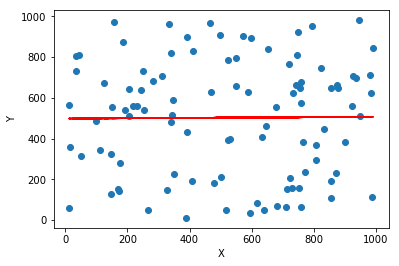

In [376]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:
    #TODO
    W, b = np.polyfit(x_data, y_data, 1)
    line = np.poly1d((W, b))
    plt.plot(x_data, line(x_data), 'r--')
    
    print("y=%.6fx+(%.6f)"%(W, b))
    
    #print Mean Squared Error
    mse = np.mean(pow(y_data - (W*x_data + b), 2))
    print ("MeanSquaredError: ",mse)
    
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))    

### Problem 3-2 Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

y=-0.004678x+(79.305097)
MeanSquaredError:  1288.37360143


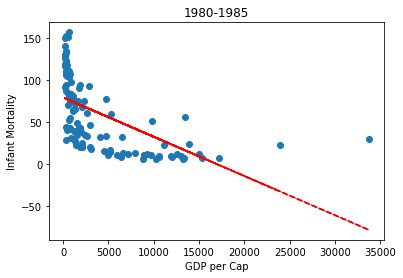

y=-0.003761x+(73.261645)
MeanSquaredError:  1081.69107947


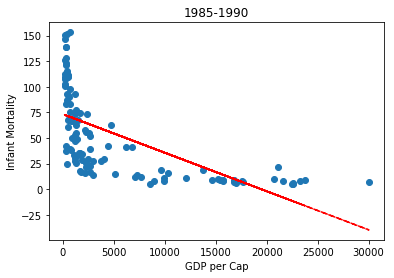

y=-0.002674x+(68.257015)
MeanSquaredError:  1454.32869633


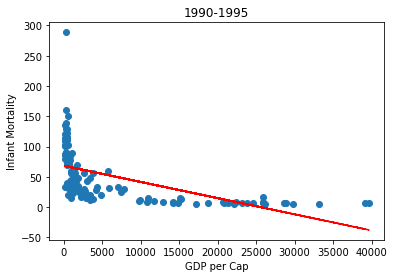

y=-0.002070x+(59.472425)
MeanSquaredError:  879.905778208


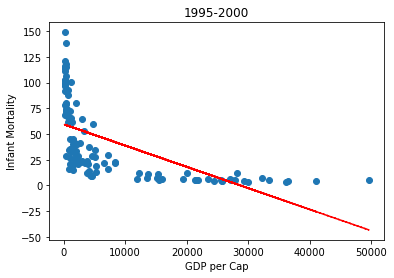

y=-0.001524x+(51.345011)
MeanSquaredError:  740.219140768


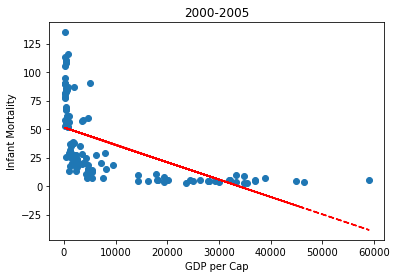

y=-0.000815x+(43.726575)
MeanSquaredError:  587.192902013


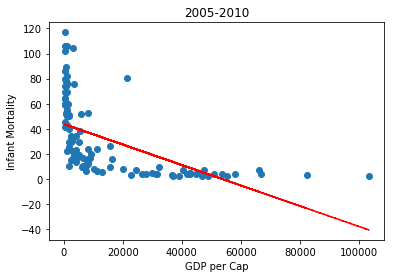

In [377]:
new_list = []

for years in IMtsv.columns:
    xData=[]
    yData=[]

    #TODO
    GDP_index = resulttsv.index
    IM_index = IMtsv.index
    index_list = np.intersect1d(GDP_index, IM_index)
    for index in index_list :
        xData.append(resulttsv.loc[index, years])
        yData.append(IMtsv.loc[index, years])
    
    xData = np.array(xData)
    yData = np.array(yData)
        
    plot_2D_trendline(xData, yData, x_label='GDP per Cap', y_label='Infant Mortality', title=years)

### Problem 3-3 Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


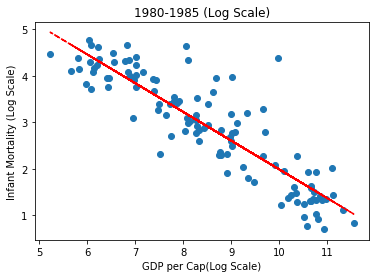

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


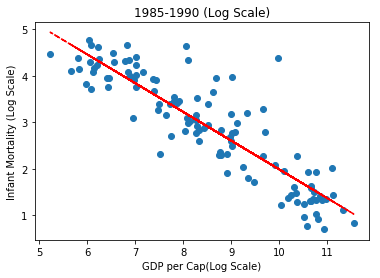

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


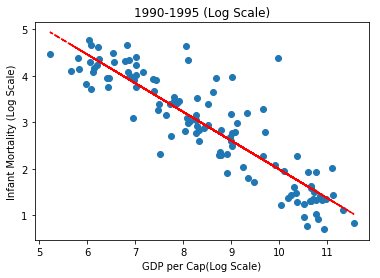

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


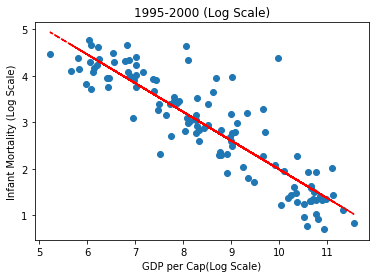

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


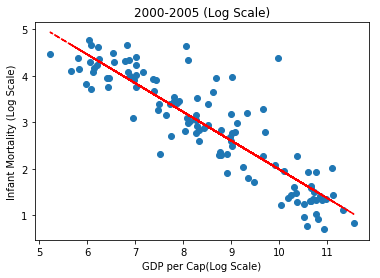

y=-0.619034x+(8.174275)
MeanSquaredError:  0.271831382728


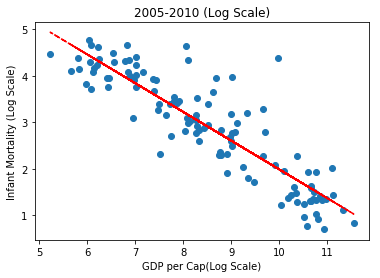

In [378]:
for years in IMtsv.columns:
    xDataLog=[]
    yDataLog=[]
    
    #TODO
    xDataLog = np.log(np.array(xData))
    yDataLog = np.log(np.array(yData))
    
    plot_2D_trendline(xDataLog, yDataLog, x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")

## Project Problem 2&3
- __Read Data forestfires.csv. Keep it mind this data is not tsv!__
- __Sorting & Filtering Data, each sub questions are independent, not related to each other. __
    - Filter rows which event occured in 1st quarter (January to April).
    - Filter rows where area is greater than average area value, and report average value also.
    - Sort descending order by FFMC value which event occured in Friday.
- __Draw plot with following directions, each sub questions are independent, not related to each other.__
    - Draw plot only using X, Y value, so we can know which part of park frequently fired.
    - Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.

In [379]:
###YOUR CODE HERE###
data = pd.read_csv('forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [380]:
###YOUR CODE HERE###
in_list = ('jan', 'feb', 'mar', 'apr')
drop_list = []

index_list = list(data.index)

for index in index_list :
    if not data.loc[index,'month'] in in_list :
        drop_list.append(index)

result = data.drop(drop_list)
result

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
16,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.00
18,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.00
19,6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.00
39,4,4,mar,tue,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,0.00
48,4,4,mar,mon,87.2,23.9,64.7,4.1,11.8,35,1.8,0.0,0.00
49,4,4,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0.00
58,2,2,feb,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.00


In [381]:
###YOUR CODE HERE###
area = data.loc[:,'area']
sum = 0
num =0
for var in area :
    sum += var
    num += 1

avg = sum/num

drop_list = []

for index in area.index :
    if area.loc[index] < avg :
        drop_list.append(index)

result = data.drop(drop_list)
result

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
204,5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
205,4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
207,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,17.20
208,6,5,sep,fri,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23
209,8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
210,4,4,oct,sat,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23
211,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00


In [382]:
###YOUR CODE HERE###
drop_list = []
for index in data.index :
    if not data.loc[index, 'day'] == 'fri' :
        drop_list.append(index)

result = data.drop(drop_list)
result = result.sort_values(['FFMC'], ascending=[False])
result

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
388,6,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,28.74
402,9,9,aug,fri,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,0.00
389,7,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,0.00
71,4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00
212,7,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13
264,4,4,aug,fri,94.3,167.6,684.4,13.0,21.8,53,3.1,0.0,6.54
124,3,4,sep,fri,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0,0.00
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46


y=0.286800x+(2.960669)
MeanSquaredError:  1.0702285458489875


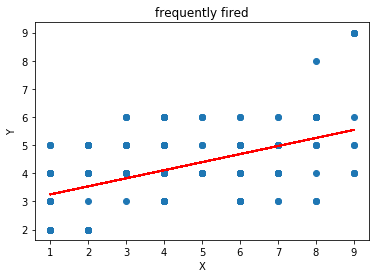

In [383]:
###YOUR CODE HERE###
x = data.loc[:, 'X']
y = data.loc[:, 'Y']

plot_2D_trendline(x, y, x_label="X", y_label='Y', title='frequently fired')

y=-0.070077x+(5.341306)
MeanSquaredError:  3.0385518878310407


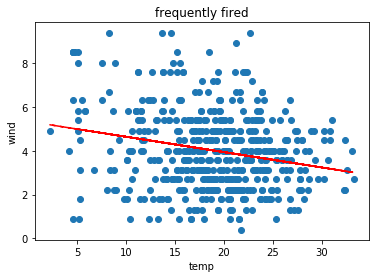

In [384]:
###YOUR CODE HERE###
x = data.loc[:,'temp']
y = data.loc[:,'wind']

plot_2D_trendline(x, y, x_label="temp", y_label='wind', title='frequently fired')

y=-1.482044x+(72.282784)
MeanSquaredError:  191.83038505390203


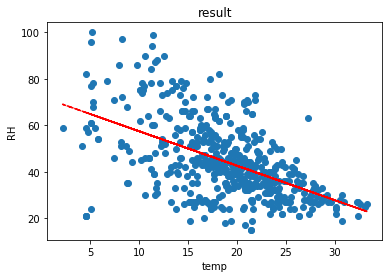

In [385]:
###YOUR CODE HERE###
x = data.loc[:, 'temp']
y = data.loc[:, 'RH']

plot_2D_trendline(x, y, x_label="temp", y_label='RH', title='result')

y=0.632152x+(41.748467)
MeanSquaredError:  264.4644991397027


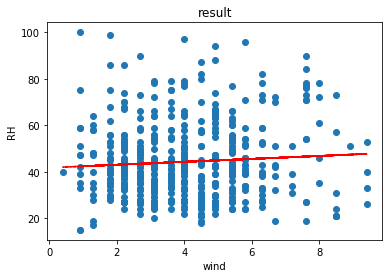

In [386]:
###YOUR CODE HERE###
x = data.loc[:,'wind']
y = data.loc[:,'RH']

plot_2D_trendline(x, y, x_label="wind", y_label='RH', title='result')

# FINISH